In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


def draw_graph(x, y):
    # 计算梯度
    y.sum().backward()
    fig = plt.figure(figsize=(12, 6), dpi=80)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x.detach().numpy(), y.detach().numpy())
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x.detach().numpy(), x.grad.numpy())
    return fig

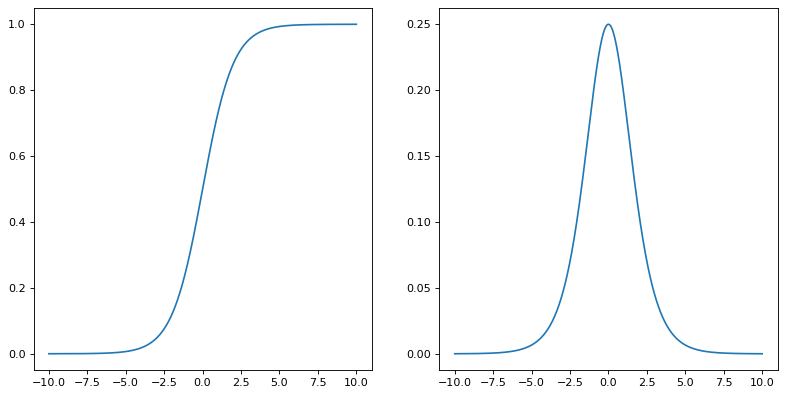

In [2]:
# Sigmoid
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.sigmoid(x)
draw_graph(x, y).savefig('sigmoid.png', dpi=200)

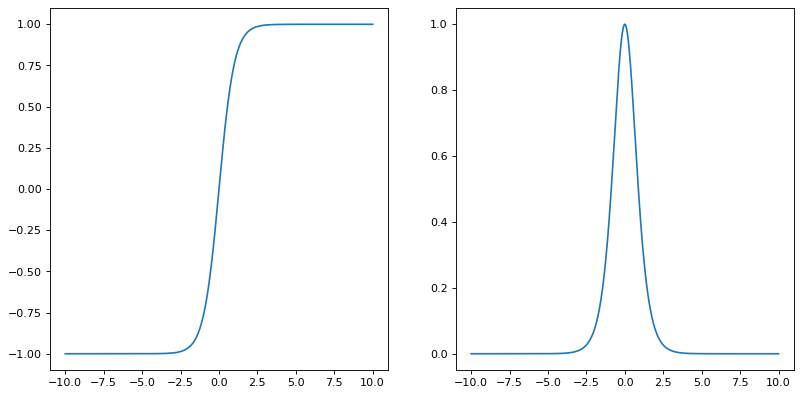

In [3]:
# Tanh
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.tanh(x)
draw_graph(x, y).savefig('tanh.png', dpi=200)

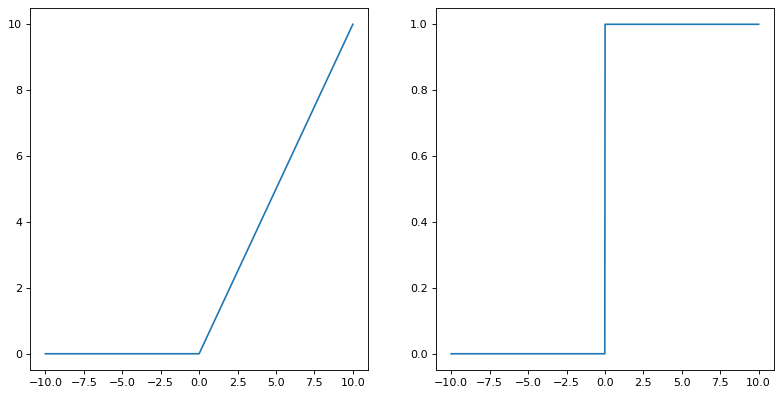

In [4]:
# ReLU
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.nn.functional.relu(x)
draw_graph(x, y).savefig('relu.png', dpi=200)

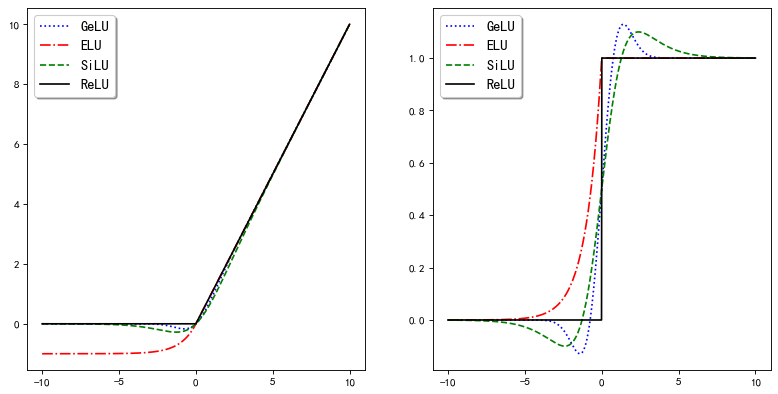

In [5]:
func = {}
# GeLU
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.nn.functional.gelu(x)
func['GeLU'] = (x, y)
# ELU
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.nn.functional.elu(x)
func['ELU'] = (x, y)
# SiLU
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.nn.functional.silu(x)
func['SiLU'] = (x, y)
# ReLU
x = torch.linspace(-10, 10, 1000)
x.requires_grad = True
y = torch.nn.functional.relu(x)
func['ReLU'] = (x, y)

# 画图
fig = plt.figure(figsize=(12, 6), dpi=80)
func_ax = fig.add_subplot(1, 2, 1)
gradient_ax = fig.add_subplot(1, 2, 2)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
style = ['b:', 'r-.', 'g--', 'k']
legends = []
for i, key in enumerate(func):
    x, y = func[key]
    y.sum().backward()
    func_ax.plot(x.detach().numpy(), y.detach().numpy(), style[i])
    gradient_ax.plot(x.detach().numpy(), x.grad.numpy(), style[i])
    legends.append(key)
func_ax.legend(legends, shadow=True)
gradient_ax.legend(legends, shadow=True)
fig.savefig('relu_family.png', dpi=200)